## Метод главных компонент 


Банникова Екатерина НПМбд-01-19

In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

Получить массивы картинок в виде массива X, а также ответов labels. 

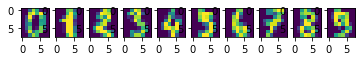

In [17]:
digits = load_digits()
fig, ax = plt.subplots(1,10)
for i in range(10):
    ax[i].imshow(digits.images[i])
X = digits['data']
labels = digits['target']


## Алгоритм PCA

Метод главных компонент состоит из следующих 4-х шагов:
1) Центрирование данных

2) Вычисление матрицы ковариации

3) Вычисление собственных векторов F и значений матрицы ковариации

4) Преобразование данных в координаты в базисе главных компонент

In [18]:
class PCA():
    # сохранение числа компонент
    def __init__(self, n_components=None):
        self.n_components = n_components
    # центрирование данных,  вычисление матрицы ковариации, вычисление собственных векторов F и значений матрицы ковариации   
    def fit(self, X):
        X1 = X
        m = np.mean(X1, axis = 0)
        X1 -= m
        C = X1.T.dot(X1)
        eig_values, F = np.linalg.eigh(C)
        eig_values = eig_values[::-1]
        F = F[:, ::-1]
        return X1, F,  eig_values
    # преобразование данных в координаты в базисе главных компонент
    def transform(self, X, F):
        Y = X.dot(F)
        return Y
    #  решение задачи метода главных координат
    def fit_transform(self, X):
        X_c, F, _ = self.fit(X)
        Y = self.transform(X_c, F)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y

Построим график собственных значений, а также график отношения кумулятивной суммы к их полной сумме. Основную долю вносят именно первые собственные значения.

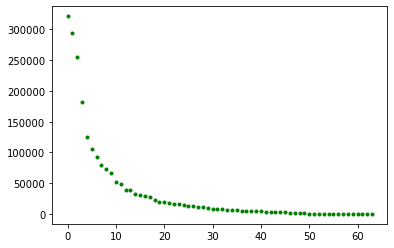

In [19]:
test = PCA(2) 
_, _,  eig_values  = test.fit(X)
plt.plot(eig_values, marker = '.', linestyle = '', color = 'green')

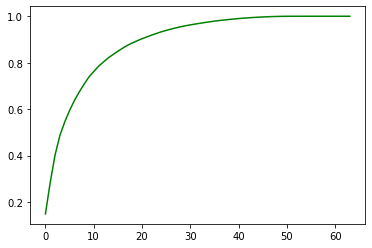

In [20]:
plt.plot(np.cumsum(eig_values) / np.sum(eig_values), color = 'green')

Изобразим на графике точки датасета в первых двух координатах главных компонент. Разным цифрам соответствуют разные цвета.

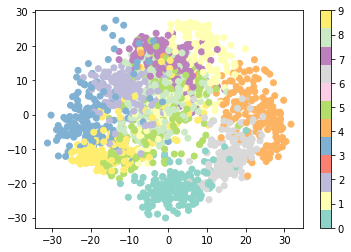

In [21]:
Y = test.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = 'Set3')
plt.colorbar()

## Алгоритм kNN

Метод init сохраняет число соседей.
Метод fit сохраняет переданные обучающие данные.
В методе predict реализуем основные вычисления для каждого неизвестного объекта: вычислияем расстояние от тестируемой точки до точек в обучающей базе. Находим k ближайших точек и смотрим, к какому классу они принадлежат. Класс, к которому принадлежит большее число соседей, и будет классом, к которому вероятнее всего принадлежит искомая точка.

In [22]:
class my_kNN(): 
    def __init__(self, n_neighbors=5): 
        self.n_neighbors = n_neighbors # n_neighbors - количество "соседей" 
        
    def fit(self, X_train, y_train):
        # Сохраняет переданные обучающие данные во внутренние переменные
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X): 
        classes = list()
        for point in X:
            norms = list() #для каждого объекта будет храниться набор расстояний до обучающих объектов
            
            for point_train in self.X_train:
                # ищем расстояние 
                norm = np.linalg.norm(np.array(point) - np.array(point_train)) 
                norms.append(norm)
                
            norms_sort = np.argsort(norms) # получаем индексы 
            minimum_norms = norms_sort[:self.n_neighbors] # выбраем первые k индексов 
            object_class = list()
            
            # сопоставляем индексы с классами объектов
            for j in minimum_norms:
                object_class.append(self.y_train[j])
                
            # находим класс, который встречается чаще всего
            object_class_set = set(object_class)
            our_class = None 
            c_our_class = 0
            for k in object_class_set:
                c = object_class.count(k)
                if c > c_our_class:
                    c_our_class = c 
                    our_class = k 
            classes.append(our_class)
        return classes

Разбили данные X и labels на обучающую и тестовую выборку, используя функцию train_test_split из модуля sklearn.model_selection. Посчитали точность на тестовой выборке, используя функцию accuracy_score из модуля sklearn.metrics для компонент от 1 до 64 и соседей от 1 до 30.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Точность при k = 1 : 98.48484848484848
Точность при k = 6 : 99.15824915824916
Точность при k = 11 : 97.81144781144782
Точность при k = 16 : 97.81144781144782
Точность при k = 21 : 96.63299663299664
Точность при k = 26 : 96.29629629629629


In [29]:
test = PCA(1)
Y = test.fit_transform(X)
print ("Количество компонент = 1")
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Количество компонент = 1
Точность при k = 1 : 26.936026936026934
Точность при k = 6 : 32.323232323232325
Точность при k = 11 : 34.34343434343434
Точность при k = 16 : 36.53198653198653
Точность при k = 21 : 37.03703703703704
Точность при k = 26 : 36.36363636363637


In [31]:
test = PCA(3)
Y = test.fit_transform(X)
print ("Количество компонент = 3")
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Количество компонент = 3
Точность при k = 1 : 71.88552188552188
Точность при k = 6 : 76.76767676767676
Точность при k = 11 : 78.28282828282829
Точность при k = 16 : 77.60942760942761
Точность при k = 21 : 75.75757575757575
Точность при k = 26 : 75.58922558922558


In [32]:
test = PCA(5)
Y = test.fit_transform(X)
print ("Количество компонент = 5")
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Количество компонент = 5
Точность при k = 1 : 91.41414141414141
Точность при k = 6 : 92.92929292929293
Точность при k = 11 : 91.91919191919192
Точность при k = 16 : 91.91919191919192
Точность при k = 21 : 91.58249158249158
Точность при k = 26 : 91.75084175084174


In [33]:
test = PCA(15)
Y = test.fit_transform(X)
print ("Количество компонент = 15")
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Количество компонент = 15
Точность при k = 1 : 98.65319865319864
Точность при k = 6 : 98.65319865319864
Точность при k = 11 : 98.14814814814815
Точность при k = 16 : 97.3063973063973
Точность при k = 21 : 97.13804713804713
Точность при k = 26 : 96.29629629629629


In [34]:
test = PCA(30)
Y = test.fit_transform(X)
print ("Количество компонент = 30")
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Количество компонент = 30
Точность при k = 1 : 98.82154882154882
Точность при k = 6 : 99.15824915824916
Точность при k = 11 : 97.97979797979798
Точность при k = 16 : 97.47474747474747
Точность при k = 21 : 97.13804713804713
Точность при k = 26 : 96.63299663299664


In [35]:
test = PCA(64)
Y = test.fit_transform(X)
print ("Количество компонент = 64")
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Количество компонент = 64
Точность при k = 1 : 98.48484848484848
Точность при k = 6 : 99.15824915824916
Точность при k = 11 : 97.81144781144782
Точность при k = 16 : 97.81144781144782
Точность при k = 21 : 96.63299663299664
Точность при k = 26 : 96.29629629629629


Наибольшая точность при максимальном количестве главных компонент = 64 и количестве соседей = 6.